# Import Modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import datetime
from dateutil import parser

In [2]:
OPENAI_API_KEY = ""
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage

# User-Defined Functions

In [4]:
from helper_functions import *

In [5]:
# Read Raw data downloded in excel format
def read_raw_data (excel_file_name: str) -> pd.DataFrame:
    try:
        df = pd.read_excel(
            excel_file,
            parse_dates=[0],           # Parse first column as datetime
            dtype={1: 'Int64'},        # Safely handle large integers
            engine='openpyxl',         # Use openpyxl for .xlsx files    
        )
        #print(df.head(5))
    
    except Exception as e:
        print("Error reading Excel file:", e)

    return df

In [6]:
# Function to get sentiment using LangChain
def get_sentiment_with_langchain (text: str) -> str:
    prompt = prompt_template.format(text=text)
    try:
        response = llm([HumanMessage(content=prompt)])
        return response.content.strip()
    except Exception as e:
        print("Error processing:", text, "\n", e)
        return "Error"

In [7]:
def compute_sentiments (df: pd.DataFrame, text_sentiment_map: dict) -> pd.DataFrame:
    for text_key in text_sentiment_map.keys():
        print(text_key, text_sentiment_map[text_key])
        df[text_sentiment_map[text_key]] = df[text_key].apply(get_sentiment_with_langchain)

    return df

# Read the Raw Data

In [8]:
excel_file = 'engagements.xlsx'
df = read_raw_data(excel_file)
df.head(5)

,timestamp,media_id,media_caption,comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️


# Proceed with a subset for Testing or if Constrained my OpenAI Limits

In [9]:
##
#n_rows = len(df)
df = df.iloc[::30]

In [10]:
len(df)

595

# Define LLM

In [11]:
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0.0)

/tmp/ipykernel_1369404/1554941544.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0.0)


# Analyze Sentiments

In [12]:
sentiment_colors = {
    'Positive': 'green',
    'Neutral': 'gray',
    'Negative': 'red'
    }

### Define a prompt template

In [13]:
prompt_template = PromptTemplate.from_template(
    "Classify the sentiment of the following text as Positive, Negative, or Neutral:\n\n{text}\n\nSentiment:"
)

### Define a map between column names with text and the corresponding sentiment

In [14]:
text_sentiment_map = {
    'media_caption': 'sentiment_media_caption',
    'comment_text': 'sentiment_comment_text',
    #'comment_text2': 'sentiment_comment_text2'
}

In [15]:
text_sentiment_map

{'media_caption': 'sentiment_media_caption',
 'comment_text': 'sentiment_comment_text'}

### Compute Sentiments

In [16]:
df = compute_sentiments (df, text_sentiment_map)
df_orig = df.copy()

media_caption sentiment_media_caption


/tmp/ipykernel_1369404/4098399969.py:5: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm([HumanMessage(content=prompt)])


comment_text sentiment_comment_text


In [17]:
df

,timestamp,media_id,media_caption,comment_text,sentiment_media_caption,sentiment_comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,Positive,Positive
30,2025-03-01 06:12:33.682000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,These all look like they smell so citrus and d...,Positive,Positive
60,2025-03-01 17:41:51.246000+00:00,18036459566140412,"Fall is finally here, and we’re beyond excited...",Bring her back 🥲,Positive,Positive
90,2025-03-01 22:27:45.770000+00:00,1050792887091067,"My go-to feel good, smell good routine! 🩷🌸🫧",It smells so good!!!!,Positive,Positive
120,2025-03-02 12:04:50.612000+00:00,17945047313797602,Mixing up the perfect self-care potion \nWhat’...,GIF,Positive,Neutral
...,...,...,...,...,...,...
17700,2025-04-02 16:30:53.153000+00:00,1125861369584218,that's that me espresso,Aliyah Skala I need this,Neutral,Neutral
17730,2025-04-02 17:12:34.599000+00:00,18076572166794234,Let us know what your Spring Vibe is going to ...,B2%,Positive,Neutral
17760,2025-04-02 17:47:45.354000+00:00,1125861369584218,that's that me espresso,Brooke Butler yum,Neutral,Positive
17790,2025-04-02 17:24:37.079000+00:00,1125861369584218,that's that me espresso,Kenzie Hall bc i think you do,Neutral,Neutral


### Visualize Sentiments

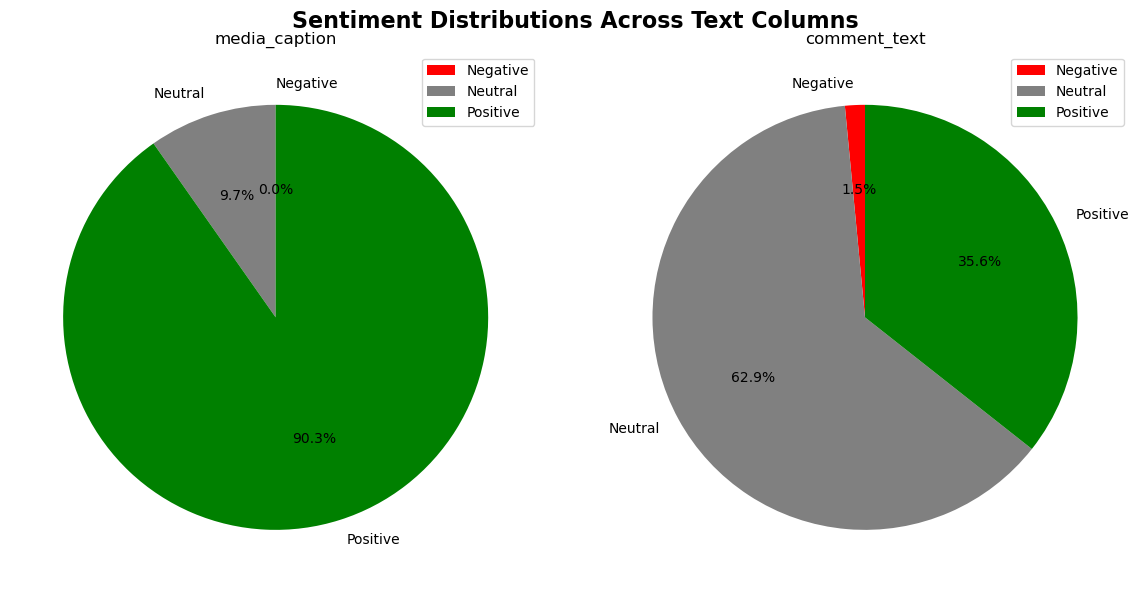

In [18]:
visualize_sentiments (df, text_sentiment_map, sentiment_colors)

# Obtain frequent words for each type of sentiment

### Define a prompt template

In [19]:
prompt_template = PromptTemplate.from_template(
    """Extract the top 10 most important keywords or phrases from the following text, and show how often each one appears. 
Return them in the format: keyword: count, one per line. Only include meaningful content words, not stopwords or punctuation.

Text:
{text}
"""
)

### Collection for Frequent Words and Terms

In [20]:
freq_words_collection = dict()
for text_key in text_sentiment_map.keys():
    #print(text_key, text_sentiment_map[text_key])
    freq_words_collection[text_key] = dict()
        

In [21]:
freq_words_collection

{'media_caption': {}, 'comment_text': {}}

### Call function

In [22]:
freq_words_collection = extract_frequent_words_for_sentiment (df_orig, text_sentiment_map, 'Positive', llm, prompt_template, freq_words_collection)


Top 10 keywords from column 'media_caption' that represent 'Positive' sentiments:
treehutcollection: 16
selfcare: 10
Tangerine: 4
shave: 4
routine: 4
skin: 4
gentle: 3
exfoliator: 3
pre-shave: 3
sugar scrub: 3

Top 10 keywords from column 'comment_text' that represent 'Positive' sentiments:
treehut: 41
PR: 33
smells: 10
good: 9
love: 8
products: 7
body: 6
scrubs: 6
favorite: 5
amazing: 5


In [23]:
freq_words_collection = extract_frequent_words_for_sentiment (df_orig, text_sentiment_map, 'Negative', llm, prompt_template, freq_words_collection)


Top 10 keywords from column 'media_caption' that represent 'Negative' sentiments:

Top 10 keywords from column 'comment_text' that represent 'Negative' sentiments:
treehut: 2
smell: 2
April fools: 2
buy: 2
perfume: 1
body wash: 1
Stacie Sergio: 1
spring break: 1
snow days: 1
coffee scent: 1


In [24]:
freq_words_collection = extract_frequent_words_for_sentiment (df_orig, text_sentiment_map, 'Neutral', llm, prompt_template, freq_words_collection)


Top 10 keywords from column 'media_caption' that represent 'Neutral' sentiments:
treehut: 10
scrubs: 6
selfcare: 6
ratings: 3
agree: 3
satisfying: 3
asmr: 3
team: 3
choice: 3
pick: 3

Top 10 keywords from column 'comment_text' that represent 'Neutral' sentiments:
treehut: 72
pr: 33
partner: 3
love: 3
back: 3
private: 2
toxic: 1
relationship: 1
forgiveness: 1
affordable: 1


### Visualize

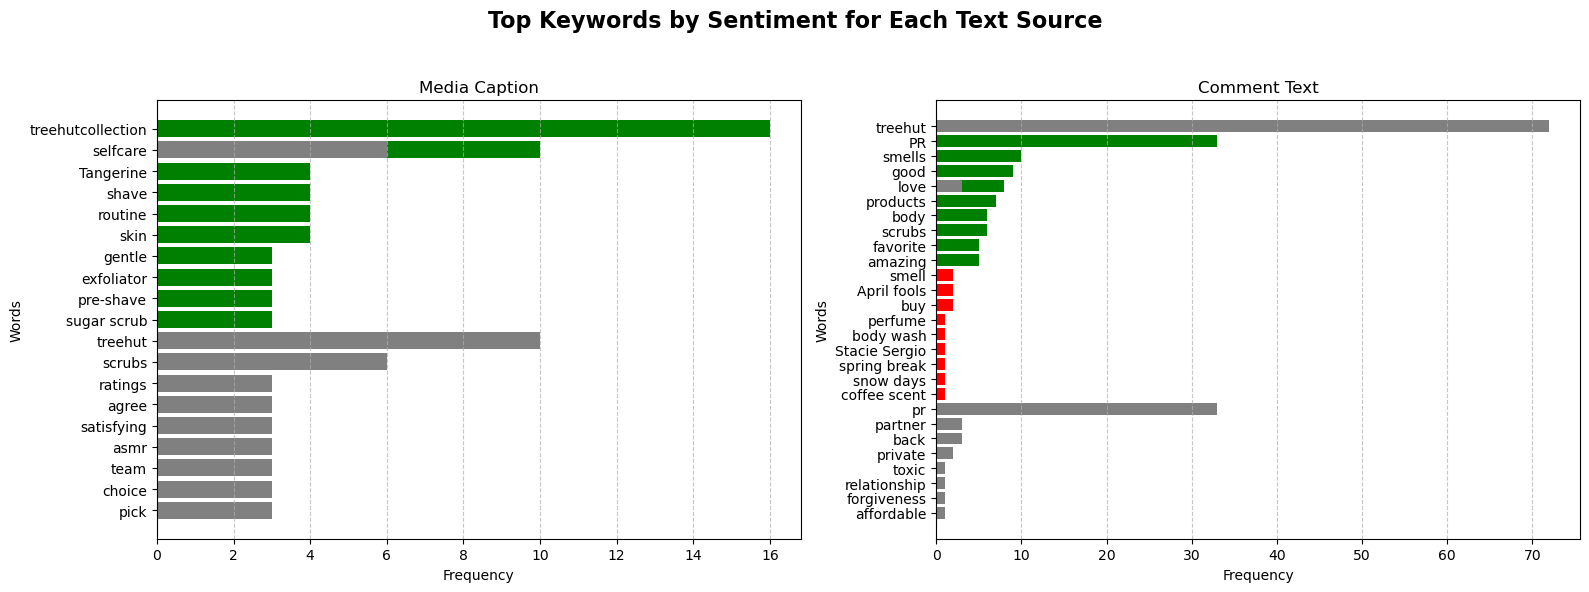

In [25]:
visualize_frequent_words_for_sentiment (freq_words_collection, sentiment_colors)

# Sentiments Trend

In [26]:
df = df_orig.copy()

### Compute Date, Hour, and DayName

In [27]:
df['timestamp'] = df['timestamp'].apply(lambda ts: parser.isoparse(ts))

In [28]:
df['Date'] = df['timestamp'].dt.date
df['Hour'] = df['timestamp'].dt.hour
df['DayName'] = df['timestamp'].dt.day_name()

In [29]:
df

,timestamp,media_id,media_caption,comment_text,sentiment_media_caption,sentiment_comment_text,Date,Hour,DayName
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,Positive,Positive,2025-03-01,0,Saturday
30,2025-03-01 06:12:33.682000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,These all look like they smell so citrus and d...,Positive,Positive,2025-03-01,6,Saturday
60,2025-03-01 17:41:51.246000+00:00,18036459566140412,"Fall is finally here, and we’re beyond excited...",Bring her back 🥲,Positive,Positive,2025-03-01,17,Saturday
90,2025-03-01 22:27:45.770000+00:00,1050792887091067,"My go-to feel good, smell good routine! 🩷🌸🫧",It smells so good!!!!,Positive,Positive,2025-03-01,22,Saturday
120,2025-03-02 12:04:50.612000+00:00,17945047313797602,Mixing up the perfect self-care potion \nWhat’...,GIF,Positive,Neutral,2025-03-02,12,Sunday
...,...,...,...,...,...,...,...,...,...
17700,2025-04-02 16:30:53.153000+00:00,1125861369584218,that's that me espresso,Aliyah Skala I need this,Neutral,Neutral,2025-04-02,16,Wednesday
17730,2025-04-02 17:12:34.599000+00:00,18076572166794234,Let us know what your Spring Vibe is going to ...,B2%,Positive,Neutral,2025-04-02,17,Wednesday
17760,2025-04-02 17:47:45.354000+00:00,1125861369584218,that's that me espresso,Brooke Butler yum,Neutral,Positive,2025-04-02,17,Wednesday
17790,2025-04-02 17:24:37.079000+00:00,1125861369584218,that's that me espresso,Kenzie Hall bc i think you do,Neutral,Neutral,2025-04-02,17,Wednesday


### Visualize Sentiments for Different Text Comments (media_caption, comment_text) as a Function of Date, Hour, and DayName

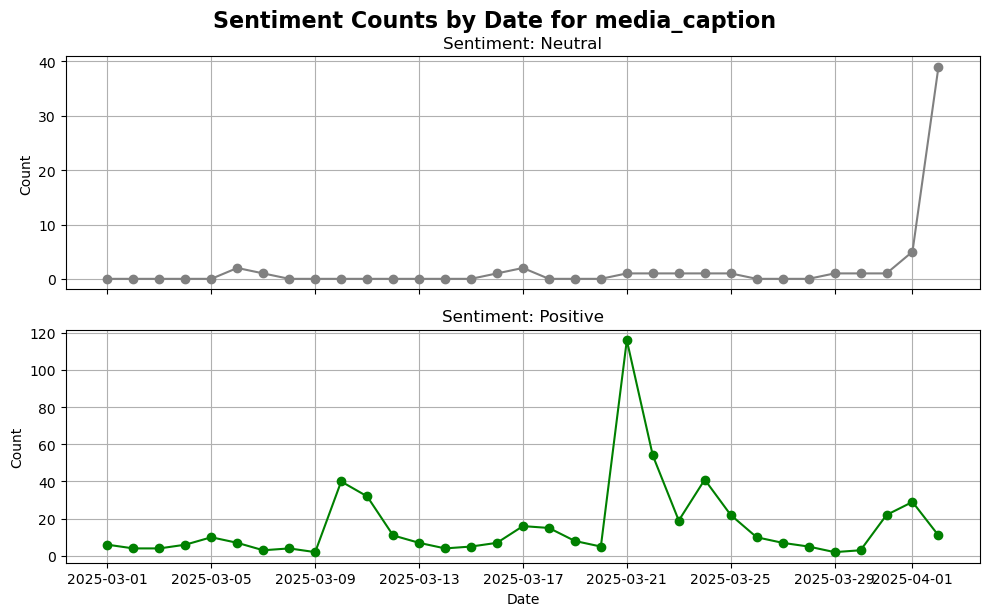

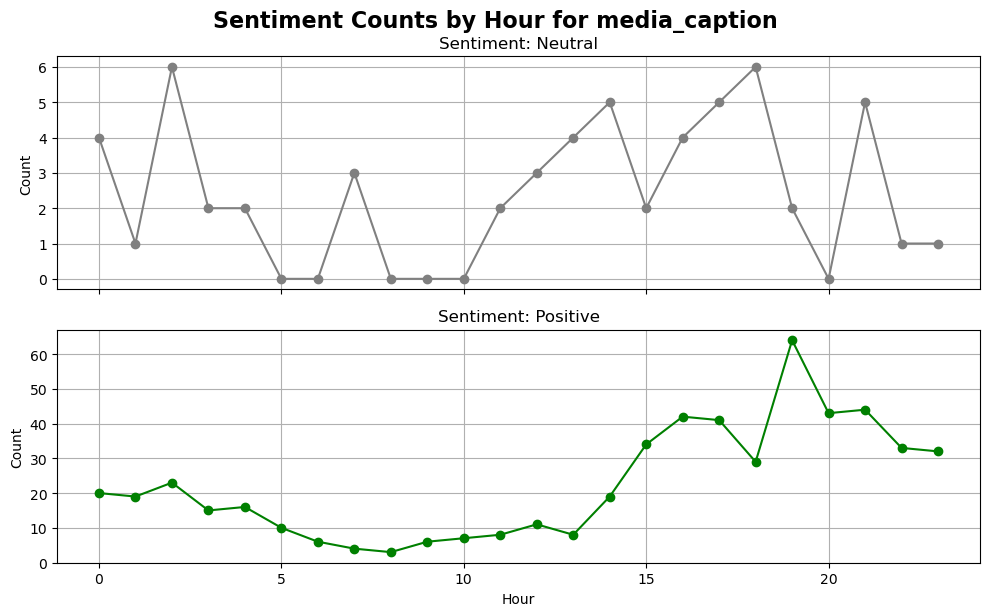

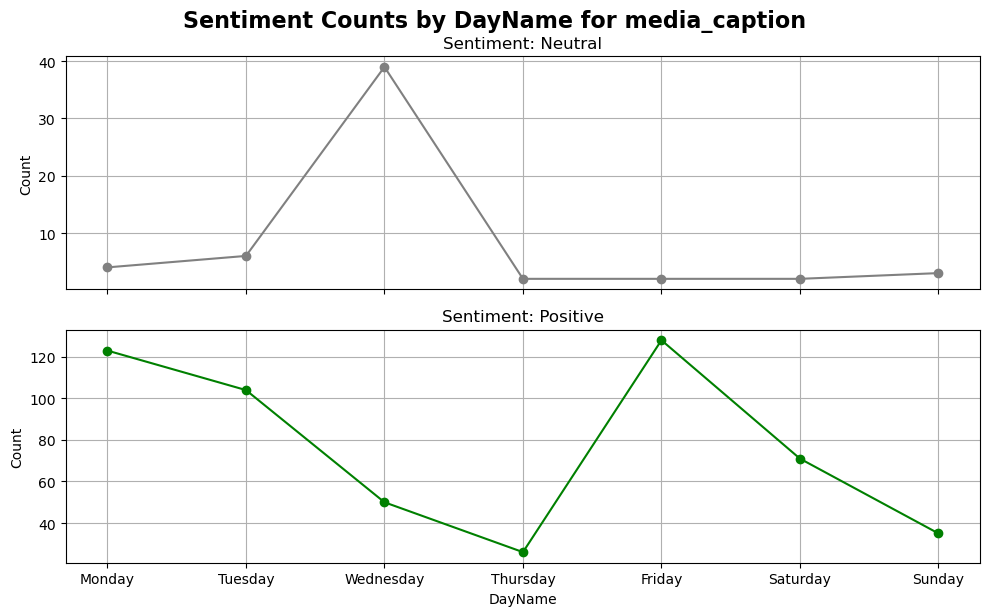

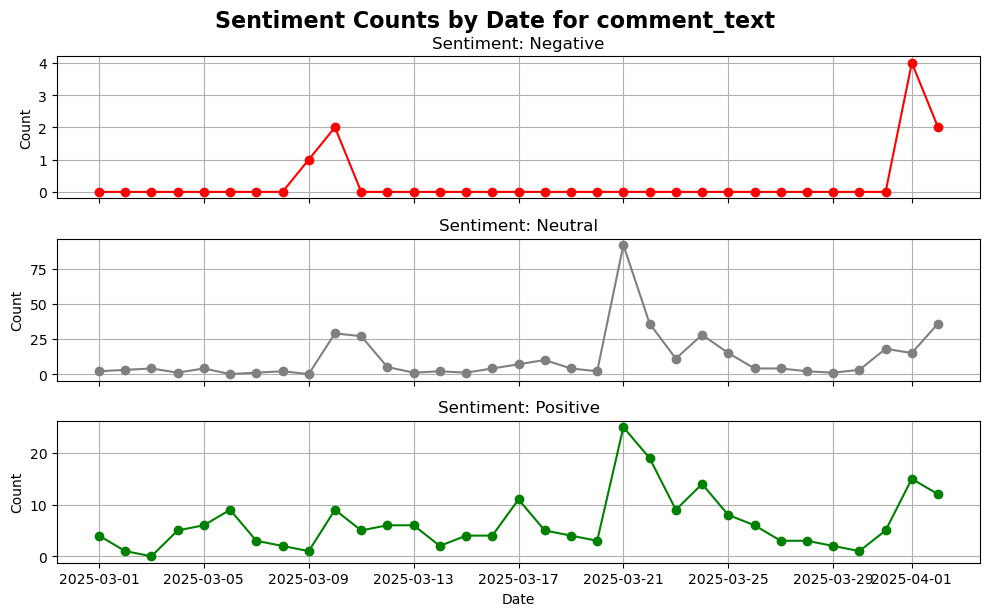

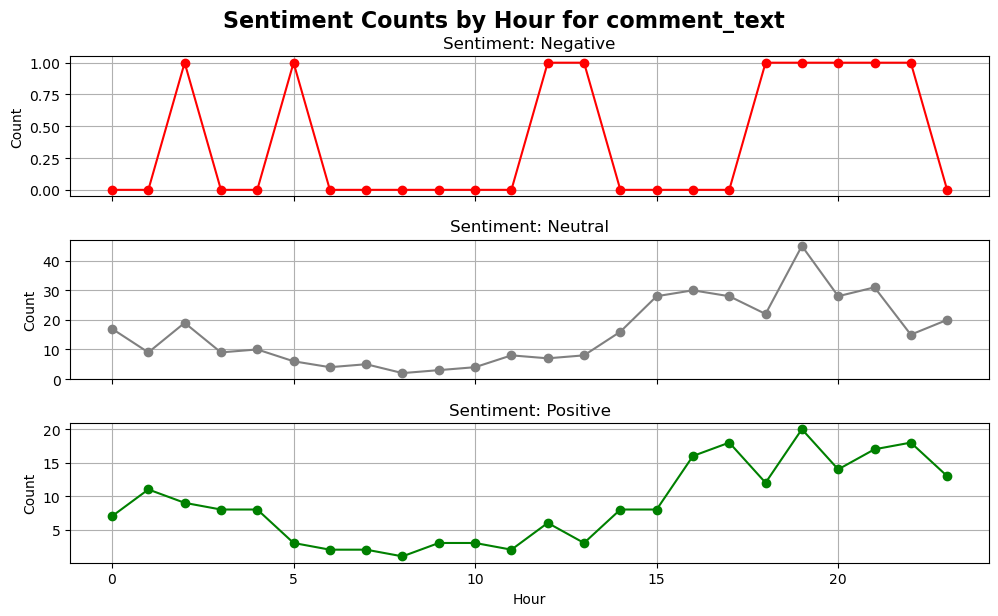

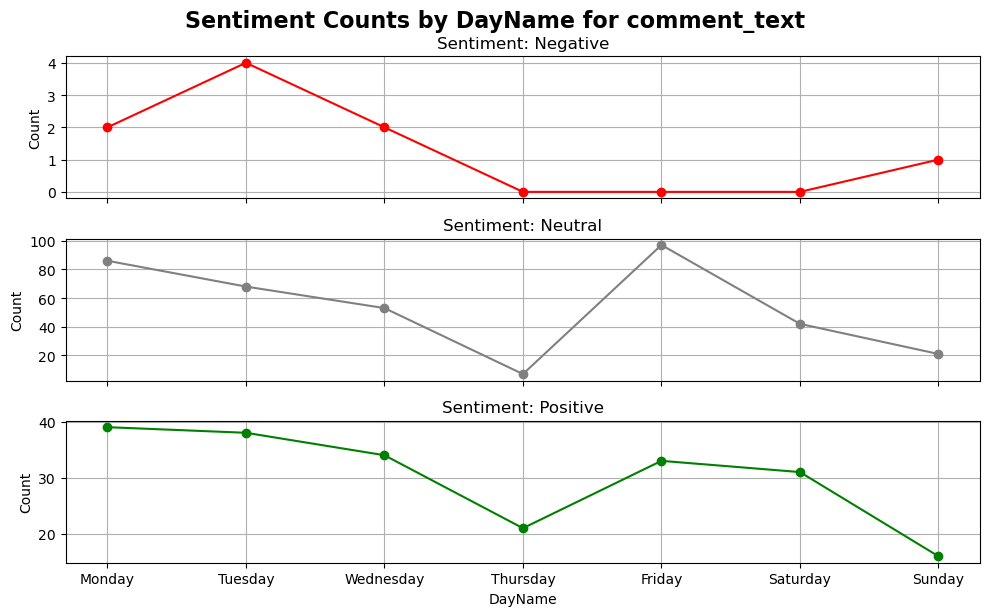

In [30]:
for text_key in text_sentiment_map.keys():
    sentiment_header = text_sentiment_map[text_key]
    for time_type in ['Date', 'Hour', 'DayName']:
        grouped = df.groupby([time_type, sentiment_header]).size().unstack(fill_value=0)
        if time_type == 'DayName':
            grouped = grouped.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        #print(grouped)
        visualize_sentiment_trend (grouped, time_type, text_key, sentiment_colors)
        